In [2]:
# imports & corrected paths (go one level up from notebooks/)
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Detect if notebook is inside /notebooks/ and go to project root
NOTEBOOK_DIR = Path.cwd()
BASE_DIR = NOTEBOOK_DIR.parent if (NOTEBOOK_DIR.name.lower() == "notebooks") else NOTEBOOK_DIR
DATA_DIR = BASE_DIR / "data"
OUTPUTS_DIR = BASE_DIR / "outputs"
OUTPUTS_DIR.mkdir(exist_ok=True)

print("Notebook directory:", NOTEBOOK_DIR)
print("Project root:", BASE_DIR)
print("Data dir:", DATA_DIR)
print("Outputs dir:", OUTPUTS_DIR)


Notebook directory: c:\Users\Rajju\Desktop\project_samarth\notebooks
Project root: c:\Users\Rajju\Desktop\project_samarth
Data dir: c:\Users\Rajju\Desktop\project_samarth\data
Outputs dir: c:\Users\Rajju\Desktop\project_samarth\outputs


### Then re-run Cell 3 exactly as before:

In [3]:
# load crop dataset
crop_file = DATA_DIR / "India Agriculture Crop Production.csv"
print("Loading crop file:", crop_file)
if not crop_file.exists():
    raise FileNotFoundError(f"Crop file not found: {crop_file}")

try:
    df_crop = pd.read_csv(crop_file, low_memory=False)
except UnicodeDecodeError:
    df_crop = pd.read_csv(crop_file, encoding='latin1', low_memory=False)

print(" Loaded crop shape:", df_crop.shape)
display(df_crop.head(8))


Loading crop file: c:\Users\Rajju\Desktop\project_samarth\data\India Agriculture Crop Production.csv
 Loaded crop shape: (345407, 10)


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118.0,Hectare,5182.0,Tonnes,1.661963
6,Andaman and Nicobar Islands,NICOBARS,Banana,2002-03,Whole Year,213.0,Hectare,1278.0,Tonnes,6.000000
7,Andaman and Nicobar Islands,NICOBARS,Banana,2003-04,Whole Year,266.0,Hectare,1763.0,Tonnes,6.627820


In [4]:
# Clean Crop Production Data 

# Ensure consistent lowercase column names
df_crop.columns = [c.strip().lower().replace(" ", "_") for c in df_crop.columns]

print("Clean data (standardized columns):", df_crop.columns.tolist())

# Drop missing essentials
df_crop = df_crop.dropna(subset=["state", "district", "crop", "year"])

# Convert numeric fields properly
df_crop["production"] = pd.to_numeric(df_crop["production"], errors="coerce")
df_crop["area"] = pd.to_numeric(df_crop["area"], errors="coerce")
df_crop["yield"] = pd.to_numeric(df_crop["yield"], errors="coerce")

# Drop rows with invalid values
df_crop = df_crop.dropna(subset=["production", "area", "yield"])

print("Cleaned crop data shape:", df_crop.shape)


Clean data (standardized columns): ['state', 'district', 'crop', 'year', 'season', 'area', 'area_units', 'production', 'production_units', 'yield']
Cleaned crop data shape: (340414, 10)


In [5]:
# Load and Explore IMD Rainfall Data
rain_file = DATA_DIR / "Sub_Division_IMD_2017.csv"
print("Loading rainfall file:", rain_file)
if not rain_file.exists():
    raise FileNotFoundError(f"Rainfall file not found: {rain_file}")

# Load the IMD rainfall dataset
df_rain = pd.read_csv(rain_file)

print("Loaded rainfall data shape:", df_rain.shape)
display(df_rain.head(10))

print("\nBasic Info:")
print("=" * 60)
print(df_rain.info())

print("\nMissing values summary:")
print("=" * 60)
print(df_rain.isna().sum())

print("\nColumn names:")
print(df_rain.columns.tolist())


Loading rainfall file: c:\Users\Rajju\Desktop\project_samarth\data\Sub_Division_IMD_2017.csv
Loaded rainfall data shape: (4188, 19)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,Andaman & Nicobar Islands,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,Andaman & Nicobar Islands,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,Andaman & Nicobar Islands,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float6

In [6]:
# Inspect original rainfall dataset columns
print("Columns in rainfall dataset:\n", df_rain.columns.tolist())
display(df_rain.head())

Columns in rainfall dataset:
 ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [7]:
# Clean and normalize rainfall data
print("Cleaning rainfall data...")
print("=" * 60)

# Convert columns to lowercase
df_rain.columns = [col.lower() for col in df_rain.columns]

# Rename for consistency
df_rain.rename(columns={
    "subdivision": "subdivision",
    "year": "year",
    "annual": "annual_rainfall"
}, inplace=True)

# Drop rows with missing rainfall or year
df_rain = df_rain.dropna(subset=["subdivision", "year", "annual_rainfall"])

# Convert year to integer
df_rain["year"] = pd.to_numeric(df_rain["year"], errors="coerce").astype(int)

print("Cleaned rainfall data shape:", df_rain.shape)
print("Unique subdivisions found:", len(df_rain["subdivision"].unique()))
print(df_rain["subdivision"].unique()[:10])

# Summary statistics
print("\nRainfall Summary:")
display(df_rain[["annual_rainfall", "jf", "mam", "jjas", "ond"]].describe())


Cleaning rainfall data...
Cleaned rainfall data shape: (4162, 19)
Unique subdivisions found: 36
['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam & Meghalaya'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh']

Rainfall Summary:


,annual_rainfall,jf,mam,jjas,ond
count,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000
mean,1409.449207,40.241903,154.772729,1061.490533,152.943609
std,902.599421,59.123666,200.213354,704.915734,166.341388
min,62.300000,0.000000,0.000000,57.400000,0.000000
25%,803.025000,4.000000,23.800000,573.275000,33.800000
50%,1120.350000,18.800000,74.200000,879.450000,97.200000
75%,1643.575000,49.875000,195.300000,1281.475000,210.875000
max,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [8]:
print("Rainfall data columns:")
print(df_rain.columns.tolist())

Rainfall data columns:
['subdivision', 'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual_rainfall', 'jf', 'mam', 'jjas', 'ond']


In [41]:
print("Merging crop and rainfall data...")
print("=" * 60)

# Map states to rainfall subdivisions
state_to_subdivision = {
    "Andaman and Nicobar Islands": "Andaman & Nicobar Islands",
    "Arunachal Pradesh": "Arunachal Pradesh",
    "Assam": "Assam & Meghalaya",
    "Meghalaya": "Assam & Meghalaya",
    "Nagaland": "Naga Mani Mizo Tripura",
    "Manipur": "Naga Mani Mizo Tripura",
    "Mizoram": "Naga Mani Mizo Tripura",
    "Tripura": "Naga Mani Mizo Tripura",
    "West Bengal": "Gangetic West Bengal",
    "Sikkim": "Sub Himalayan West Bengal & Sikkim",
    "Odisha": "Orissa",
    "Jharkhand": "Jharkhand",
    "Bihar": "Bihar",
    "Uttar Pradesh": "East Uttar Pradesh",
    "Uttarakhand": "West Uttar Pradesh",
    "Haryana": "Haryana Delhi Chandigarh",
    "Delhi": "Haryana Delhi Chandigarh",
    "Punjab": "Punjab",
    "Himachal Pradesh": "Himachal Pradesh",
    "Jammu and Kashmir": "Jammu & Kashmir",
    "Chhattisgarh": "Chhattisgarh",
    "Madhya Pradesh": "West Madhya Pradesh",
    "Gujarat": "Saurashtra Kutch & Diu",
    "Maharashtra": "Konkan & Goa",
    "Goa": "Konkan & Goa",
    "Andhra Pradesh": "Coastal Andhra Pradesh",
    "Telangana": "Telangana",
    "Karnataka": "South Interior Karnataka",
    "Kerala": "Kerala",
    "Tamil Nadu": "Tamil Nadu",
    "Rajasthan": "East Rajasthan"
}

# Add subdivision column to crop data
df_crop["subdivision"] = df_crop["state"].map(state_to_subdivision)

# Extract year as integer
df_crop["year_cleaned"] = df_crop["year"].astype(str).str.extract(r"(\d{4})").astype(int)

# Merge datasets
df_merged = pd.merge(
    df_crop,
    df_rain[["subdivision", "year", "annual_rainfall"]],
    left_on=["subdivision", "year_cleaned"],
    right_on=["subdivision", "year"],
    how="inner"
)

# ✅ Save merged dataset for later use (for RAG system)
df_merged.to_csv("merged_agri_climate_data.csv", index=False)
print("Merged dataset saved as 'merged_agri_climate_data.csv'")

print(f"Merged dataset shape: {df_merged.shape}")
print(df_merged[["state", "district", "crop", "year_cleaned", "annual_rainfall", "production", "yield"]].head(10))


Merging crop and rainfall data...
Merged dataset saved as 'merged_agri_climate_data.csv'
Merged dataset shape: (281509, 14)
                         state                  district      crop  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut   
5  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut   
6  Andaman and Nicobar Islands                  NICOBARS    Banana   
7  Andaman and Nicobar Islands                  NICOBARS    Banana   
8  Andaman and Nicobar Islands            SOUTH ANDAMANS    Banana   
9  Andaman and Nicobar Islands            SOUTH ANDAMANS    Banana   

   year_cleaned  annual_rainfall  production     yield  
0          2001           3080.9      2061.0  1.

In [ ]:
# Exploratory Data Analysis (EDA)
print("Performing exploratory analysis...")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns

# Basic overview
print("Merged dataset info:")
print(df_merged.info())

print("\nSummary statistics:")
display(df_merged[["area", "production", "yield", "annual_rainfall"]].describe())


Performing exploratory analysis...
Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281509 entries, 0 to 281508
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   state             281509 non-null  object 
 1   district          281509 non-null  object 
 2   crop              281509 non-null  object 
 3   year_x            281509 non-null  object 
 4   season            281509 non-null  object 
 5   area              281509 non-null  float64
 6   area_units        281509 non-null  object 
 7   production        281509 non-null  float64
 8   production_units  281509 non-null  object 
 9   yield             281509 non-null  float64
 10  subdivision       281509 non-null  object 
 11  year_cleaned      281509 non-null  int64  
 12  year_y            281509 non-null  int64  
 13  annual_rainfall   281509 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 30.1+ MB
No

,area,production,yield,annual_rainfall
count,2.815090e+05,2.815090e+05,281509.000000,281509.000000
mean,1.173311e+04,1.023107e+06,83.177290,1321.154755
std,4.747475e+04,2.214158e+07,932.732951,739.142459
min,8.000000e-02,0.000000e+00,0.000000,274.700000
25%,8.000000e+01,8.300000e+01,0.544970,802.100000
50%,5.680000e+02,6.950000e+02,1.000000,1098.000000
75%,4.228000e+03,6.843000e+03,2.387097,1557.200000
max,8.580100e+06,1.597800e+09,38800.000000,3828.000000



Correlation matrix:


,production,yield,annual_rainfall
production,1.000000,0.446379,0.031709
yield,0.446379,1.000000,0.023363
annual_rainfall,0.031709,0.023363,1.000000


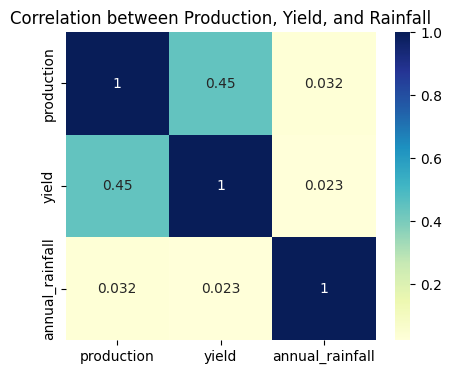

In [ ]:
# Correlation analysis
corr = df_merged[["production", "yield", "annual_rainfall"]].corr()
print("\nCorrelation matrix:")
display(corr)

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation between Production, Yield, and Rainfall")
plt.show()

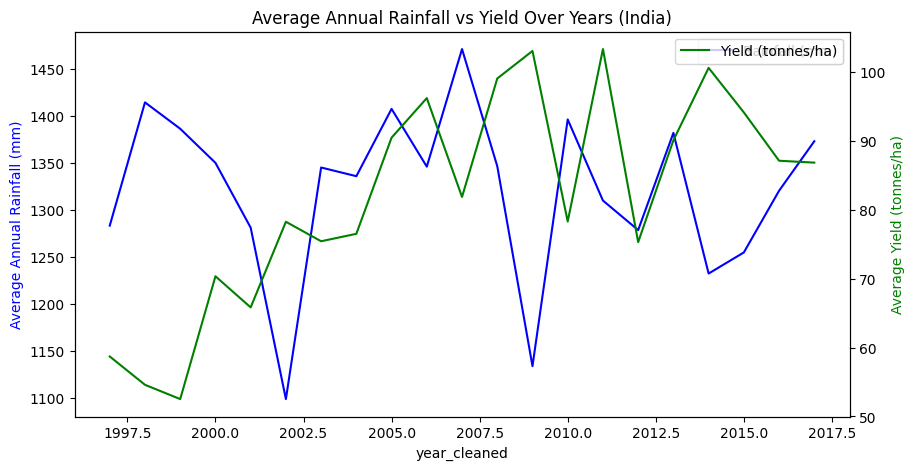

In [ ]:
# Average yield vs rainfall (national trend)
trend_df = (
    df_merged.groupby("year_cleaned")[["annual_rainfall", "yield"]]
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data=trend_df, x="year_cleaned", y="annual_rainfall", ax=ax1, color="blue", label="Rainfall (mm)")
ax1.set_ylabel("Average Annual Rainfall (mm)", color="blue")
ax2 = ax1.twinx()
sns.lineplot(data=trend_df, x="year_cleaned", y="yield", ax=ax2, color="green", label="Yield (tonnes/ha)")
ax2.set_ylabel("Average Yield (tonnes/ha)", color="green")
plt.title("Average Annual Rainfall vs Yield Over Years (India)")
plt.show()

C:\Users\Rajju\AppData\Local\Temp\ipykernel_7348\3474327814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


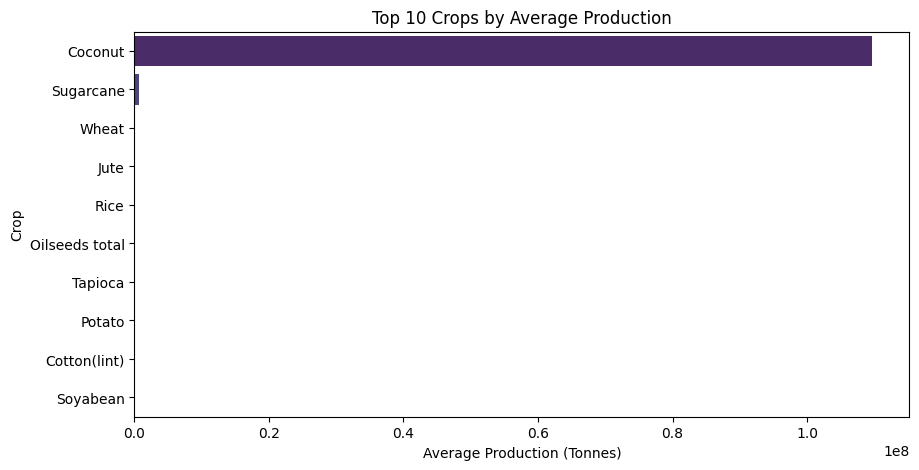

In [ ]:
# Top 10 crops by average production
top_crops = (
    df_merged.groupby("crop")["production"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.xlabel("Average Production (Tonnes)")
plt.ylabel("Crop")
plt.title("Top 10 Crops by Average Production")
plt.show()


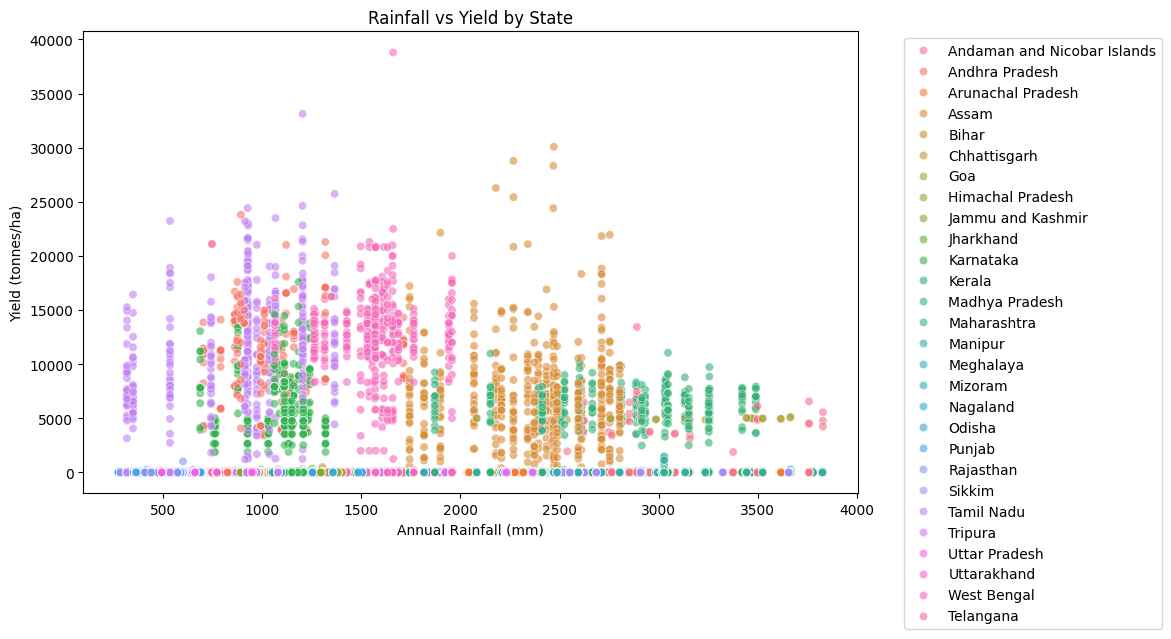

In [14]:
# State-wise rainfall vs yield scatter
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x="annual_rainfall", y="yield", hue="state", alpha=0.6)
plt.title("Rainfall vs Yield by State")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Yield (tonnes/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analyzing rainfall vs crop yield correlation...


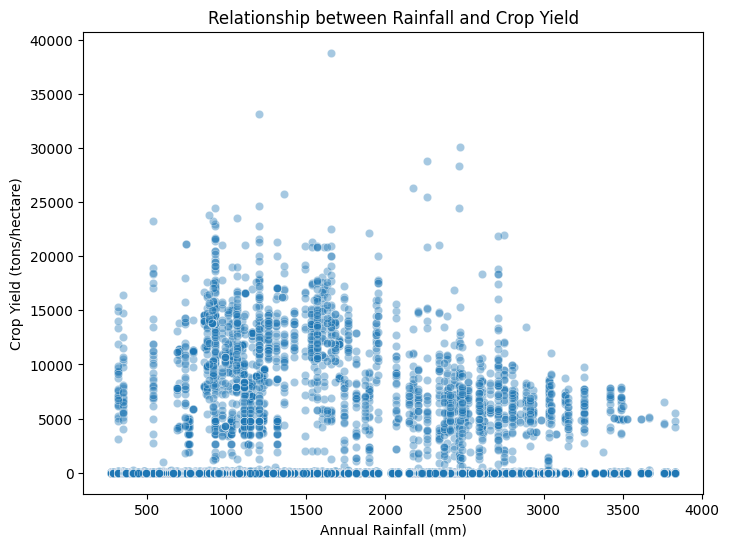


Correlation between annual rainfall and crop yield: 0.023


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing rainfall vs crop yield correlation...")
print("=" * 60)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="annual_rainfall", y="yield", alpha=0.4)
plt.title("Relationship between Rainfall and Crop Yield")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Crop Yield (tons/hectare)")
plt.show()

corr = df_merged["annual_rainfall"].corr(df_merged["yield"])
print(f"\nCorrelation between annual rainfall and crop yield: {corr:.3f}")


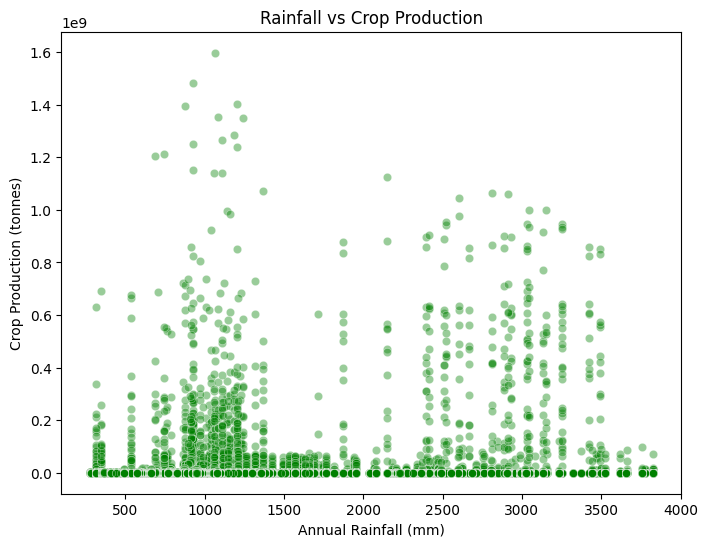

In [ ]:
# Rainfall vs Production
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="annual_rainfall", y="production", alpha=0.4, color="green")
plt.title("Rainfall vs Crop Production")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Crop Production (tonnes)")
plt.show()


C:\Users\Rajju\AppData\Local\Temp\ipykernel_7348\3849168775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield.values, y=avg_yield.index, palette="viridis")


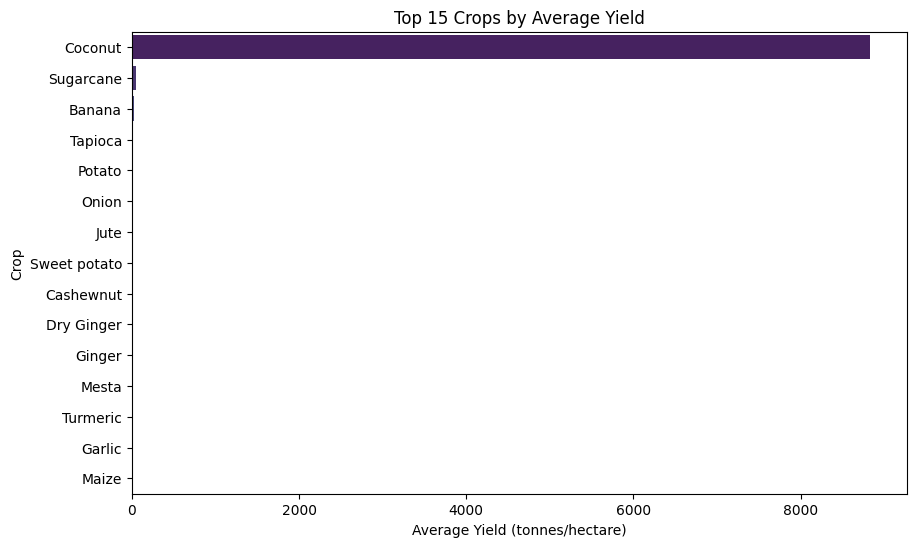

In [ ]:
# Average yield by crop type
avg_yield = df_merged.groupby("crop")["yield"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_yield.values, y=avg_yield.index, palette="viridis")
plt.title("Top 15 Crops by Average Yield")
plt.xlabel("Average Yield (tonnes/hectare)")
plt.ylabel("Crop")
plt.show()

C:\Users\Rajju\AppData\Local\Temp\ipykernel_7348\3187192837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rain.values, y=avg_rain.index, palette="coolwarm")


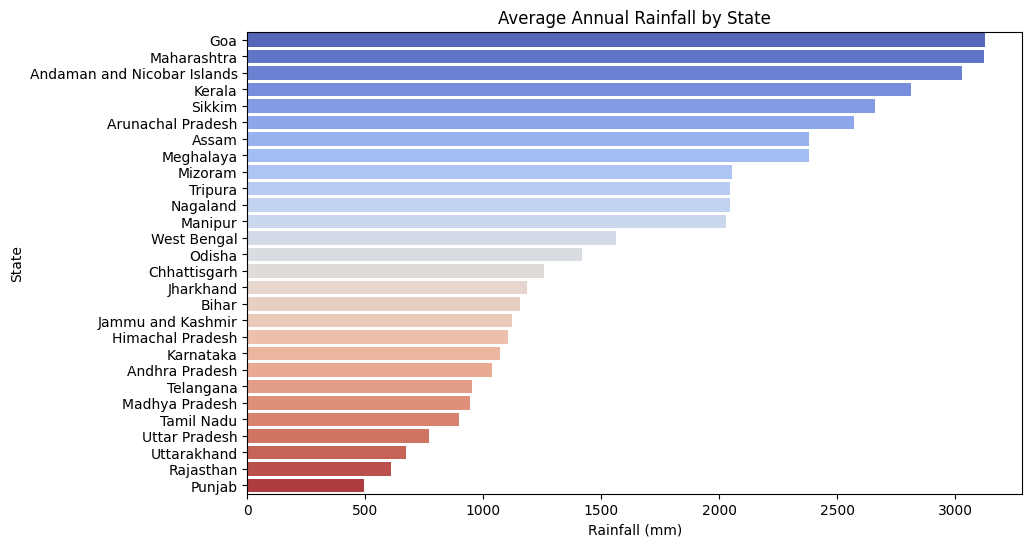

In [ ]:
# Average rainfall by state
avg_rain = df_merged.groupby("state")["annual_rainfall"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rain.values, y=avg_rain.index, palette="coolwarm")
plt.title("Average Annual Rainfall by State")
plt.xlabel("Rainfall (mm)")
plt.ylabel("State")
plt.show()

Plotting relationships between rainfall, yield, and production...


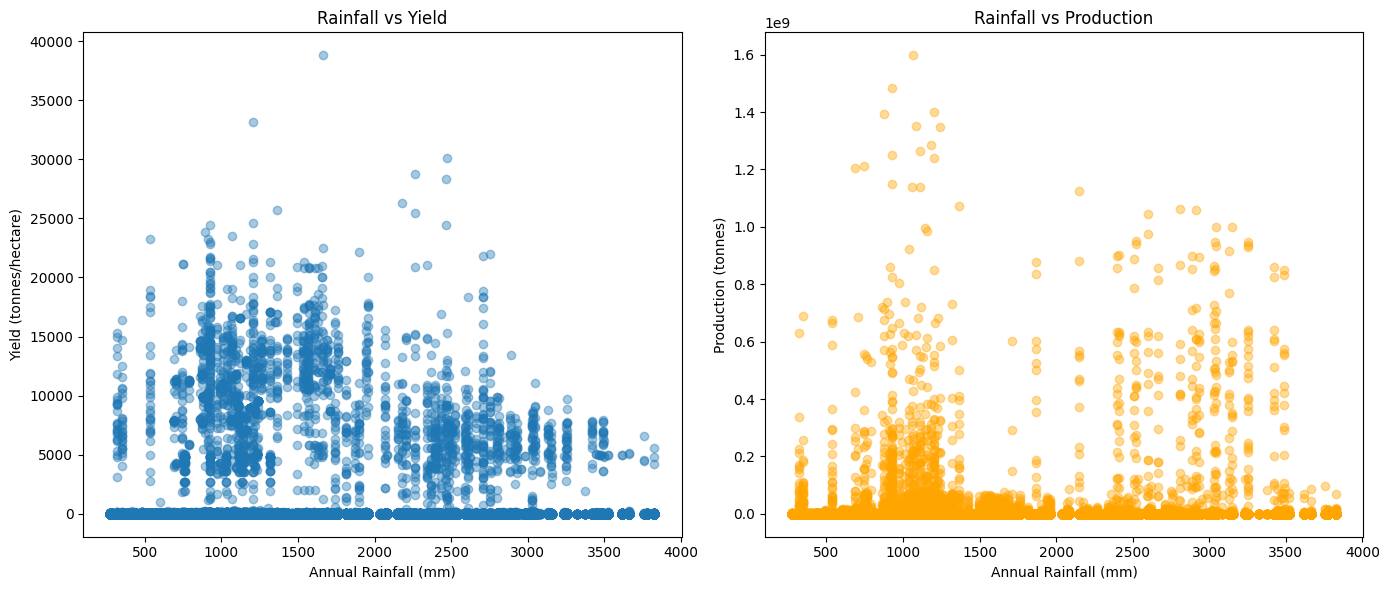

In [ ]:
# SVisualization — Rainfall vs Yield and Production
import matplotlib.pyplot as plt

print("Plotting relationships between rainfall, yield, and production...")
print("=" * 60)

plt.figure(figsize=(14, 6))

# Rainfall vs Yield
plt.subplot(1, 2, 1)
plt.scatter(df_merged["annual_rainfall"], df_merged["yield"], alpha=0.4)
plt.title("Rainfall vs Yield")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Yield (tonnes/hectare)")

# Rainfall vs Production
plt.subplot(1, 2, 2)
plt.scatter(df_merged["annual_rainfall"], df_merged["production"], alpha=0.4, color="orange")
plt.title("Rainfall vs Production")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Production (tonnes)")

plt.tight_layout()
plt.show()


Analyzing average rainfall vs average yield by state...


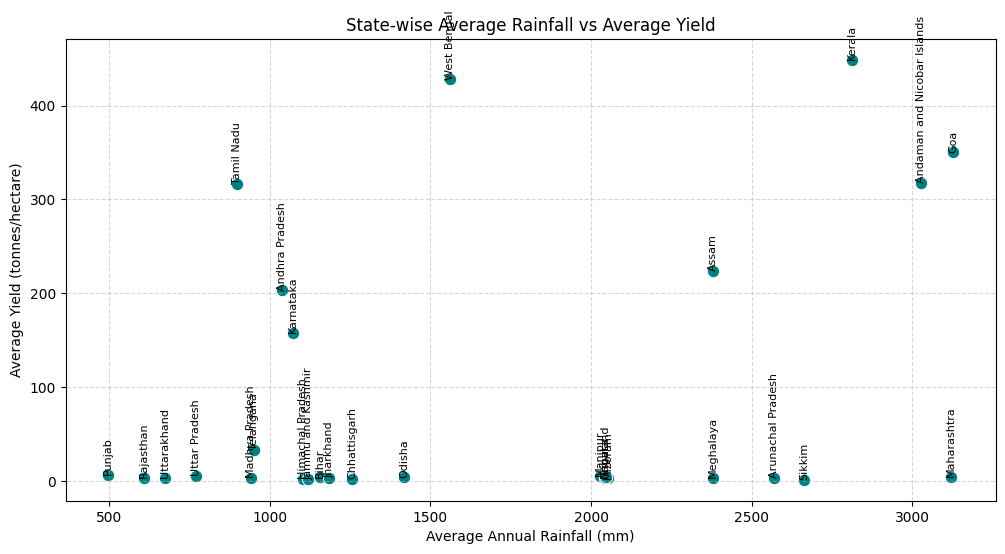

In [ ]:
# State-Level Analysis — Average Rainfall vs Average Yield
import seaborn as sns
import matplotlib.pyplot as plt

print("Analyzing average rainfall vs average yield by state...")
print("=" * 60)

statewise = df_merged.groupby("state")[["annual_rainfall", "yield"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=statewise, x="annual_rainfall", y="yield", s=80, color="teal")
plt.title("State-wise Average Rainfall vs Average Yield")
plt.xlabel("Average Annual Rainfall (mm)")
plt.ylabel("Average Yield (tonnes/hectare)")

# Rotate state labels vertically
for i in range(len(statewise)):
    plt.text(
        statewise["annual_rainfall"][i],
        statewise["yield"][i],
        statewise["state"][i],
        fontsize=8,
        rotation=90,  # 👈 makes text vertical
        ha='center',
        va='bottom'
    )

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Performing correlation analysis between rainfall, yield, and production...

Correlation Matrix:
                 annual_rainfall     yield  production
annual_rainfall         1.000000  0.023363    0.031709
yield                   0.023363  1.000000    0.446379
production              0.031709  0.446379    1.000000


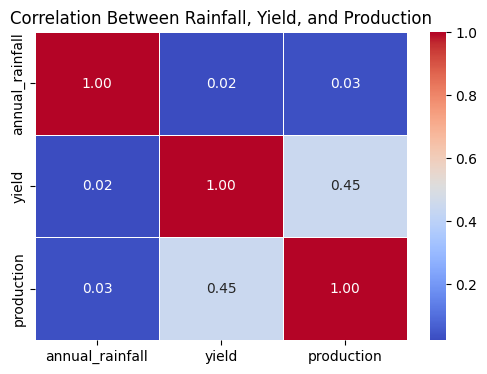

In [26]:
# Correlation Analysis
print("Performing correlation analysis between rainfall, yield, and production...")
print("=" * 60)

# Select relevant numeric columns
corr_df = df_merged[["annual_rainfall", "yield", "production"]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Rainfall, Yield, and Production")
plt.show()


Analyzing average yield by state...
                         state       yield
0                       Kerala  448.963885
1                  West Bengal  428.034712
2                          Goa  350.268367
3  Andaman and Nicobar Islands  317.565390
4                   Tamil Nadu  316.969154


C:\Users\Rajju\AppData\Local\Temp\ipykernel_7348\2981054608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_yield, x="yield", y="state", palette="viridis")


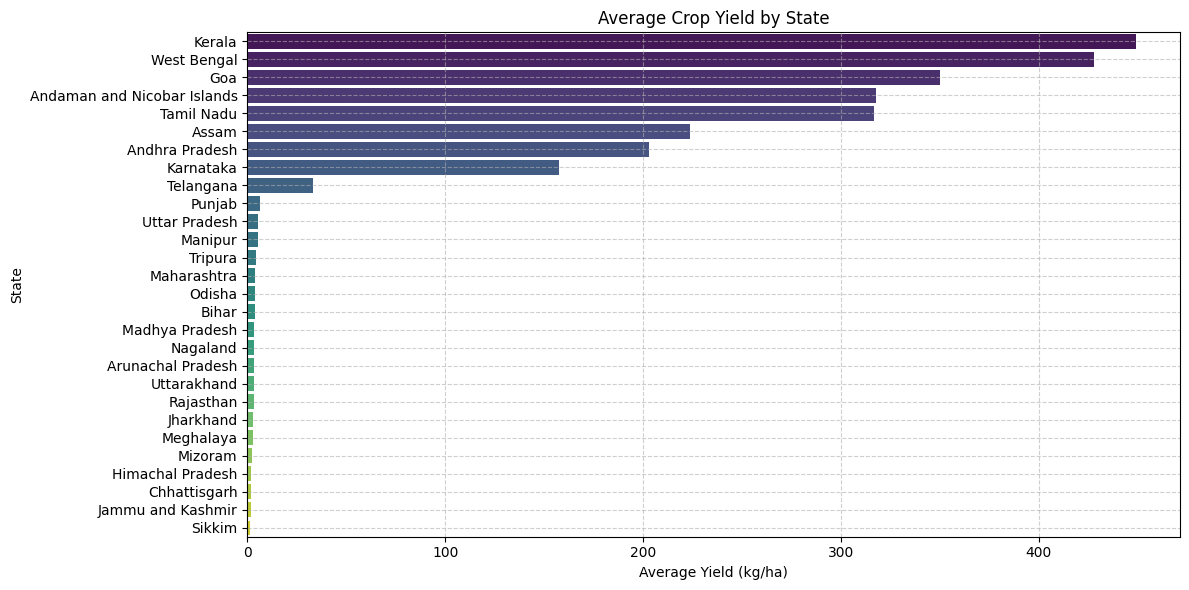

In [28]:
# State-wise Average Yield Comparison
print("Analyzing average yield by state...")
print("=" * 60)

# Compute average yield per state
state_yield = (
    df_merged.groupby("state")["yield"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(state_yield.head())

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_yield, x="yield", y="state", palette="viridis")

plt.title("Average Crop Yield by State")
plt.xlabel("Average Yield (kg/ha)")
plt.ylabel("State")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Analyzing correlation between rainfall and crop yield...
📈 Correlation between rainfall and yield: 0.023


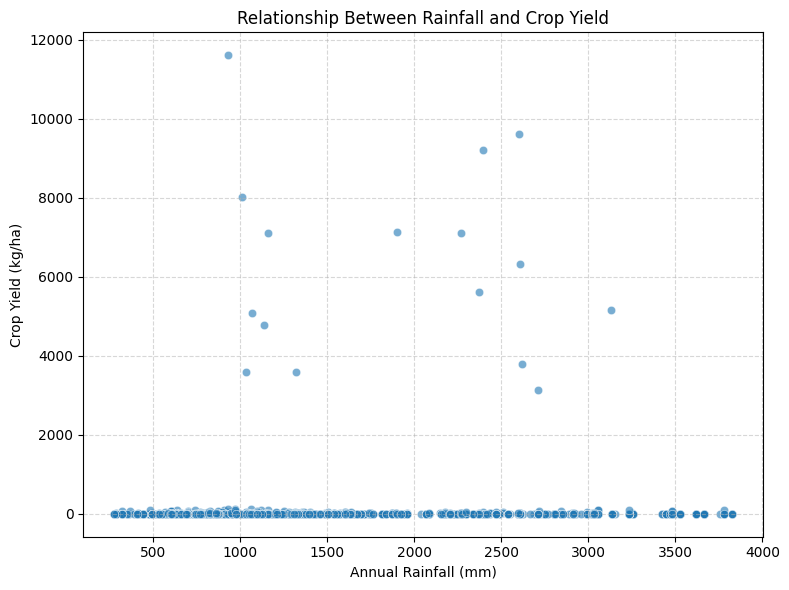

In [30]:
# Relationship Between Rainfall and Crop Yield
print("Analyzing correlation between rainfall and crop yield...")
print("=" * 60)

# Compute correlation
correlation = df_merged["annual_rainfall"].corr(df_merged["yield"])
print(f"📈 Correlation between rainfall and yield: {correlation:.3f}")

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_merged.sample(2000, random_state=42),  # sample to keep plot clear
    x="annual_rainfall",
    y="yield",
    alpha=0.6
)
plt.title("Relationship Between Rainfall and Crop Yield")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Crop Yield (kg/ha)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Analyzing crop-wise productivity trends...
Top 5 crops: ['Rice', 'Maize', 'Moong(Green Gram)', 'Urad', 'Sesamum']


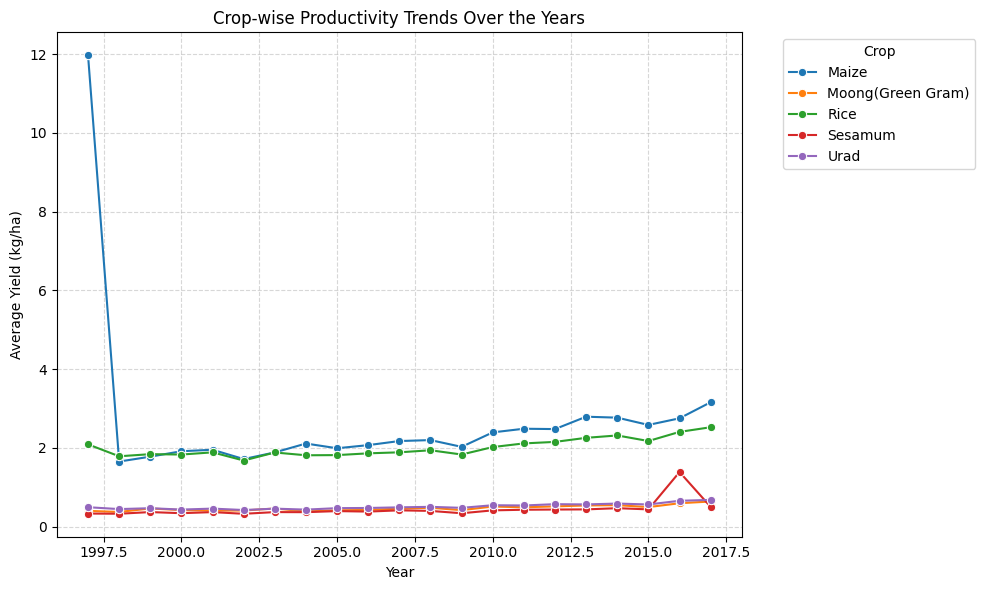

In [ ]:
# Crop-wise Productivity Trends Over the Years
print("Analyzing crop-wise productivity trends...")
print("=" * 60)

# Select top 5 most cultivated crops
top_crops = (
    df_merged["crop"].value_counts().head(5).index.tolist()
)
print("Top 5 crops:", top_crops)

# Filter data for these crops
df_top_crops = df_merged[df_merged["crop"].isin(top_crops)]

# Compute average yield per year per crop
yield_trend = (
    df_top_crops.groupby(["year_cleaned", "crop"])["yield"]
    .mean()
    .reset_index()
)

# Plot trends
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=yield_trend,
    x="year_cleaned",
    y="yield",
    hue="crop",
    marker="o"
)
plt.title("Crop-wise Productivity Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Yield (kg/ha)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [36]:
# ==========================================
# Step 15: Intelligent Question Understanding
# ==========================================
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from typing import Dict

print("Initializing question parser...")

# Load small English model for entity extraction
nlp = spacy.load("en_core_web_sm")

# Define possible question categories
QUESTION_TYPES = {
    "compare_rainfall": ["compare", "rainfall", "precipitation"],
    "top_crops": ["top", "highest", "most produced", "production"],
    "trend_analysis": ["trend", "over the years", "increase", "decrease", "growth"],
    "correlation_analysis": ["correlate", "relationship", "impact", "effect"],
    "policy_argument": ["policy", "promote", "support", "argument"]
}

def classify_question(text: str) -> str:
    """Classify question type based on keywords."""
    text_lower = text.lower()
    for q_type, keywords in QUESTION_TYPES.items():
        if any(k in text_lower for k in keywords):
            return q_type
    return "unknown"

def extract_entities(text: str) -> Dict:
    """Extract states, crops, years, and numbers from question."""
    doc = nlp(text)
    entities = {"states": [], "crops": [], "years": [], "numbers": []}

    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:  # Geographical
            entities["states"].append(ent.text)
        elif ent.label_ == "DATE" and re.search(r"\d{4}", ent.text):
            entities["years"].append(int(re.search(r"\d{4}", ent.text).group()))
        elif ent.label_ == "CARDINAL":
            entities["numbers"].append(int(ent.text)) if ent.text.isdigit() else None
        elif ent.label_ == "ORG":
            entities["states"].append(ent.text)
        else:
            # Try detecting crop names manually
            crop_keywords = ["rice", "wheat", "maize", "cotton", "sugarcane", "millet", "barley", "tea", "coffee"]
            if any(crop in ent.text.lower() for crop in crop_keywords):
                entities["crops"].append(ent.text)
    return entities

def parse_question(question: str) -> Dict:
    """Main parser that returns structured info about a question."""
    q_type = classify_question(question)
    ents = extract_entities(question)
    return {"question": question, "type": q_type, "entities": ents}

# Example tests
examples = [
    "Compare the average annual rainfall in Kerala and Tamil Nadu for the last 5 years.",
    "Which district in Maharashtra had the highest rice production last year?",
    "Show trend of maize yield in Karnataka over the last decade.",
]

for q in examples:
    print("\nQuestion:", q)
    print(parse_question(q))


Initializing question parser...

Question: Compare the average annual rainfall in Kerala and Tamil Nadu for the last 5 years.
{'question': 'Compare the average annual rainfall in Kerala and Tamil Nadu for the last 5 years.', 'type': 'compare_rainfall', 'entities': {'states': ['Kerala'], 'crops': [], 'years': [], 'numbers': []}}

Question: Which district in Maharashtra had the highest rice production last year?
{'question': 'Which district in Maharashtra had the highest rice production last year?', 'type': 'top_crops', 'entities': {'states': ['Maharashtra'], 'crops': [], 'years': [], 'numbers': []}}

Question: Show trend of maize yield in Karnataka over the last decade.
{'question': 'Show trend of maize yield in Karnataka over the last decade.', 'type': 'trend_analysis', 'entities': {'states': ['Karnataka'], 'crops': [], 'years': [], 'numbers': []}}


In [37]:
import pandas as pd

def compare_rainfall(states, years, rainfall_df):
    """
    Compare average annual rainfall between two states for the last N years.
    Args:
        states: list of two state names
        years: list or int representing N years
        rainfall_df: DataFrame with columns ['State', 'Year', 'Annual_Rainfall']
    Returns:
        summary: string summary of comparison
        result_df: filtered dataframe with comparison data
    """

    if not states or len(states) < 2:
        return "Please provide two states to compare.", None

    # Handle 'last N years'
    if isinstance(years, int):
        latest_year = rainfall_df['Year'].max()
        selected_years = list(range(latest_year - years + 1, latest_year + 1))
    else:
        selected_years = years

    # Filter data
    df_filtered = rainfall_df[(rainfall_df['State'].isin(states)) & 
                              (rainfall_df['Year'].isin(selected_years))]

    # Group and compute averages
    avg_rainfall = df_filtered.groupby('State')['Annual_Rainfall'].mean().reset_index()
    avg_rainfall.columns = ['State', 'Avg_Annual_Rainfall']

    # Generate summary
    summary = (f"From {selected_years[0]} to {selected_years[-1]}, "
               f"{avg_rainfall.iloc[0]['State']} had an average annual rainfall of "
               f"{avg_rainfall.iloc[0]['Avg_Annual_Rainfall']:.2f} mm, while "
               f"{avg_rainfall.iloc[1]['State']} had {avg_rainfall.iloc[1]['Avg_Annual_Rainfall']:.2f} mm.")

    return summary, avg_rainfall


In [38]:
# Example rainfall dataset
rainfall_data = {
    "State": ["Kerala", "Tamil Nadu", "Kerala", "Tamil Nadu", "Kerala", "Tamil Nadu"],
    "Year": [2019, 2019, 2020, 2020, 2021, 2021],
    "Annual_Rainfall": [3100, 950, 2950, 980, 3200, 1050]
}
rainfall_df = pd.DataFrame(rainfall_data)

# Compare Kerala vs Tamil Nadu for last 3 years
summary, result = compare_rainfall(["Kerala", "Tamil Nadu"], 3, rainfall_df)
print(summary)
print(result)


From 2019 to 2021, Kerala had an average annual rainfall of 3083.33 mm, while Tamil Nadu had 993.33 mm.
        State  Avg_Annual_Rainfall
0      Kerala          3083.333333
1  Tamil Nadu           993.333333


In [39]:
def answer_question(parsed_question, rainfall_df):
    q_type = parsed_question.get("type")
    entities = parsed_question.get("entities", {})

    if q_type == "compare_rainfall":
        states = entities.get("states", [])
        numbers = entities.get("numbers", [5])  # Default 5 years
        years = numbers[0] if numbers else 5
        summary, result_df = compare_rainfall(states, years, rainfall_df)
        print("\n✅ Answer:")
        print(summary)
        display(result_df)

    else:
        print("⚠️ Question type not yet supported.")


In [40]:
sample_question = {
    "question": "Compare the average annual rainfall in Kerala and Tamil Nadu for the last 3 years.",
    "type": "compare_rainfall",
    "entities": {"states": ["Kerala", "Tamil Nadu"], "years": [], "numbers": [3]}
}

answer_question(sample_question, rainfall_df)



✅ Answer:
From 2019 to 2021, Kerala had an average annual rainfall of 3083.33 mm, while Tamil Nadu had 993.33 mm.


,State,Avg_Annual_Rainfall
0,Kerala,3083.333333
1,Tamil Nadu,993.333333
